<a href="https://colab.research.google.com/github/Sedowlas/EDA/blob/main/Fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Расход топлива: город и шоссе рейтинги расхода топлива показаны в литрах на 100 километров (Л/100 км) - комбинированный рейтинг (55% город, 45% шоссе) показан в Л/100 км и в милях на имперский галлон (mpg)
  
Выбросы CO2: выбросы углекислого газа в выхлопной трубе (в граммах на километр) для комбинированного вождения по городу и шоссе

#Загрузка данных

https://drive.google.com/file/d/1xABx3PPzMaaPWJogThPQ1YKOgJ6-Nbop/view?usp=sharing

In [ ]:
! gdown 1xABx3PPzMaaPWJogThPQ1YKOgJ6-Nbop

Downloading...
From: https://drive.google.com/uc?id=1xABx3PPzMaaPWJogThPQ1YKOgJ6-Nbop
To: /content/MY2022 Fuel Consumption Ratings.csv
100% 73.0k/73.0k [00:00<00:00, 66.7MB/s]


#Предобработка

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/MY2022 Fuel Consumption Ratings.csv')

In [ ]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.isna().mean()


model_year                           0.0
make                                 0.0
model                                0.0
vehicle_class                        0.0
engine_size(l)                       0.0
cylinders                            0.0
transmission                         0.0
fuel_type                            0.0
fuel_consumption_(city_(l/100_km)    0.0
fuel_consumption(hwy_(l/100_km))     0.0
fuel_consumption(comb_(l/100_km))    0.0
fuel_consumption(comb_(mpg))         0.0
co2_emissions(g/km)                  0.0
co2_rating                           0.0
smog_rating                          0.0
dtype: float64

In [ ]:
len(df)

946

In [ ]:
df.head()

,model_year,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_(city_(l/100_km),fuel_consumption(hwy_(l/100_km)),fuel_consumption(comb_(l/100_km)),fuel_consumption(comb_(mpg)),co2_emissions(g/km),co2_rating,smog_rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [ ]:
df['vehicle_class'].value_counts()

SUV: Small                 197
SUV: Standard              141
Mid-size                   117
Pickup truck: Standard     113
Subcompact                  80
Compact                     69
Full-size                   64
Two-seater                  51
Minicompact                 48
Pickup truck: Small         20
Station wagon: Small        19
Special purpose vehicle     12
Station wagon: Mid-size      8
Minivan                      7
Name: vehicle_class, dtype: int64

Выявили классы машин

In [ ]:
df['make'].value_counts()

Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: make, dtype: int64

Выявили марки машин

In [ ]:
df.groupby('fuel_consumption_(city_(l/100_km)')['engine_size(l)'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption_(city_(l/100_km),,,
4.0,1,1.6,1.6
4.3,1,1.6,1.6
4.4,4,1.7,1.7
4.5,1,1.6,1.6
4.6,1,1.8,1.8
...,...,...,...
22.4,1,6.2,6.2
23.1,2,5.3,5.3
26.5,1,6.5,6.5


Сделали сводную таблицу  
Смотрим fuel_consumption_(city_(l/100_km) - расход топлива по городу
с engine_size(l) - обьем двигателя

In [ ]:
df['fuel_consumption_(city_(l/100_km)_group'] = pd.cut(df['fuel_consumption_(city_(l/100_km)'],20)

Сделали группу для fuel_consumption_(city_(l/100_km)

In [ ]:
df.groupby('fuel_consumption_(city_(l/100_km)_group')['engine_size(l)'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption_(city_(l/100_km)_group,,,
"(3.974, 5.315]",14,1.857143,1.80
"(5.315, 6.63]",13,2.223077,2.50
"(6.63, 7.945]",27,1.851852,1.80
"(7.945, 9.26]",100,1.918000,2.00
"(9.26, 10.575]",130,2.182308,2.00
"(10.575, 11.89]",147,2.451020,2.30
"(11.89, 13.205]",166,3.026506,3.00
"(13.205, 14.52]",101,3.480198,3.30
"(14.52, 15.835]",94,4.336170,4.00


Сделали сводную таблицу по сделанной группе и выявили 2 машины с самым большим обьемом двигателя и расходом топлива по городу (28.985--30.3) 

In [ ]:
df.groupby('make')['engine_size(l)'].agg(['count','mean','median'])

,count,mean,median
make,,,
Acura,8,2.487500,2.20
Alfa Romeo,6,2.300000,2.00
Aston Martin,5,4.480000,4.00
Audi,45,2.908889,2.90
BMW,60,3.460000,3.00
Bentley,8,5.000000,5.00
Bugatti,3,8.000000,8.00
Buick,9,1.977778,1.40
Cadillac,26,3.192308,2.85


Узнали самый большой обьем двигателя у марки машин (Bugatti)

In [ ]:
df.groupby('make')['fuel_consumption_(city_(l/100_km)'].agg(['count','mean','median'])

,count,mean,median
make,,,
Acura,8,11.487500,11.30
Alfa Romeo,6,11.500000,10.65
Aston Martin,5,15.140000,16.40
Audi,45,12.360000,11.40
BMW,60,13.546667,13.90
Bentley,8,17.437500,17.40
Bugatti,3,29.133333,30.30
Buick,9,10.244444,10.00
Cadillac,26,12.719231,11.95


Выявили топ-3 марки машин с самым большим расходом топлива по городу  
1-Bugatti 2-Rolls-Royce 3-Lamborghini

In [ ]:
df.groupby('fuel_consumption_(city_(l/100_km)')['cylinders'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption_(city_(l/100_km),,,
4.0,1,4.000000,4.0
4.3,1,4.000000,4.0
4.4,4,4.000000,4.0
4.5,1,4.000000,4.0
4.6,1,4.000000,4.0
...,...,...,...
22.4,1,8.000000,8.0
23.1,2,8.000000,8.0
26.5,1,12.000000,12.0


In [ ]:
df['fuel_consumption_(city_(l/100_km)_group2'] = pd.cut(df['fuel_consumption_(city_(l/100_km)'],20)

In [ ]:
df.groupby('fuel_consumption_(city_(l/100_km)_group2')['cylinders'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption_(city_(l/100_km)_group2,,,
"(3.974, 5.315]",14,4.000000,4.0
"(5.315, 6.63]",13,3.923077,4.0
"(6.63, 7.945]",27,4.000000,4.0
"(7.945, 9.26]",100,3.880000,4.0
"(9.26, 10.575]",130,4.230769,4.0
"(10.575, 11.89]",147,4.673469,4.0
"(11.89, 13.205]",166,5.433735,6.0
"(13.205, 14.52]",101,6.257426,6.0
"(14.52, 15.835]",94,7.085106,8.0


Выявили 2 машины с большим количеством целиндров и расходом топлива по городу

In [ ]:
df.groupby(['make','transmission'])['fuel_consumption_(city_(l/100_km)'].agg(['count','mean','median'])

count       mean  median
make         transmission                          
Acura        AM8               1   9.900000    9.90
             AS10              7  11.714286   11.30
Alfa Romeo   A8                6  11.500000   10.65
Aston Martin A8                4  14.725000   14.75
             A9                1  16.800000   16.80
...                          ...        ...     ...
Volkswagen   AM7               3   9.533333    9.30
             AS6               1   9.700000    9.70
             AS8               8  10.925000   11.25
             M6                4   9.675000    9.45
Volvo        AS8              12  10.700000   10.70

[140 rows x 3 columns]

 Сделали сводник и посмотрели марки машин с расходом топлива (по городу) по трансмиссии 

In [ ]:
df.groupby(['fuel_consumption(hwy_(l/100_km))'])['engine_size(l)'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption(hwy_(l/100_km)),,,
3.9,1,1.6,1.6
4.1,1,1.6,1.6
4.2,1,1.6,1.6
4.5,1,1.8,1.8
4.6,1,2.0,2.0
...,...,...,...
16.4,2,5.3,5.3
16.5,1,6.2,6.2
16.6,1,8.0,8.0


Сделали сводник и выявили расход топлива(20.9) количество машин (count-2) и обьем двигателя (8.0) по шоссе

In [ ]:
df.groupby(['fuel_consumption(hwy_(l/100_km))'])['cylinders'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption(hwy_(l/100_km)),,,
3.9,1,4.0,4.0
4.1,1,4.0,4.0
4.2,1,4.0,4.0
4.5,1,4.0,4.0
4.6,1,4.0,4.0
...,...,...,...
16.4,2,8.0,8.0
16.5,1,8.0,8.0
16.6,1,16.0,16.0


In [ ]:
df.groupby(['make','transmission'])['fuel_consumption(hwy_(l/100_km))'].agg(['count','mean','median'])

count       mean  median
make         transmission                          
Acura        AM8               1   7.000000    7.00
             AS10              7   8.914286    9.10
Alfa Romeo   A8                6   8.483333    8.20
Aston Martin A8                4  10.200000   10.25
             A9                1  11.900000   11.90
...                          ...        ...     ...
Volkswagen   AM7               3   7.066667    7.00
             AS6               1   6.600000    6.60
             AS8               8   8.400000    8.90
             M6                4   6.775000    6.65
Volvo        AS8              12   7.816667    7.70

[140 rows x 3 columns]

 Сделали сводник и посмотрели марки машин с расходом топлива (по шоссе) по трансмиссии 

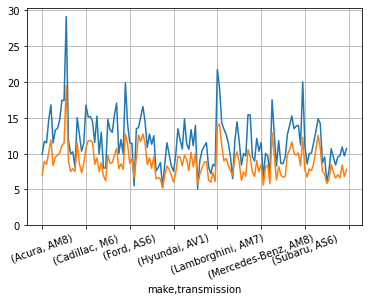

In [ ]:
df.groupby(['make','transmission'])['fuel_consumption_(city_(l/100_km)'].mean().plot(rot=20,ylim=0,grid=True)
df.groupby(['make','transmission'])['fuel_consumption(hwy_(l/100_km))'].mean().plot(rot=20,ylim=0,grid=True)

Сделали общий график на основании сводников по расходу топлива учитывая марки машин и вид трансмиссий в городе и шоссе
Синий график - по городу  
Оранжевый график - по шоссе  
Топ-3 марки машин и трансмиссий по расходу топлива (город, шоссе)  
1- Bugatti (город-30, шоссе-20, трансмиссия-АМ7)  
2- Lamborgini (город-19, шоссе-14, трансмиссия AS8)  
3- Lamborgini (город-18, шоссе-12, трансмисся AM7)  

In [ ]:
df.groupby(['fuel_consumption(comb_(l/100_km))'])['engine_size(l)'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption(comb_(l/100_km)),,,
4.0,1,1.6,1.6
4.2,1,1.6,1.6
4.4,1,1.6,1.6
4.5,2,1.8,1.8
4.6,2,1.6,1.6
...,...,...,...
19.8,1,6.2,6.2
21.2,1,6.5,6.5
21.5,4,5.9,5.9


Выявили больший комбинированный расход топлива (22--26) 3 машины с обьемом двигателя 8

In [ ]:
df.groupby(['fuel_consumption(comb_(l/100_km))'])['cylinders'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption(comb_(l/100_km)),,,
4.0,1,4.0,4.0
4.2,1,4.0,4.0
4.4,1,4.0,4.0
4.5,2,4.0,4.0
4.6,2,4.0,4.0
...,...,...,...
19.8,1,8.0,8.0
21.2,1,12.0,12.0
21.5,4,10.0,10.0


Выявили больший комбинированный расход топлива (22--26) 3 машины с 16 целиндрами

In [ ]:
df.groupby(['make','transmission'])['fuel_consumption(comb_(l/100_km))'].agg(['count','mean','median'])

count       mean  median
make         transmission                          
Acura        AM8               1   8.600000    8.60
             AS10              7  10.457143   10.30
Alfa Romeo   A8                6  10.116667    9.45
Aston Martin A8                4  12.650000   12.65
             A9                1  14.600000   14.60
...                          ...        ...     ...
Volkswagen   AM7               3   8.433333    8.30
             AS6               1   8.300000    8.30
             AS8               8   9.787500   10.20
             M6                4   8.375000    8.20
Volvo        AS8              12   9.408333    9.45

[140 rows x 3 columns]

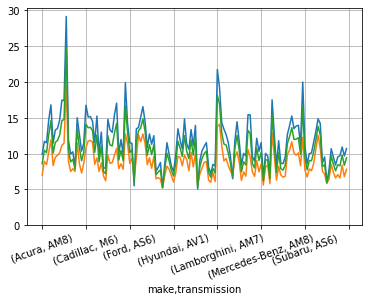

In [ ]:
df.groupby(['make','transmission'])['fuel_consumption_(city_(l/100_km)'].mean().plot(rot=20,ylim=0,grid=True)
df.groupby(['make','transmission'])['fuel_consumption(hwy_(l/100_km))'].mean().plot(rot=20,ylim=0,grid=True)
df.groupby(['make','transmission'])['fuel_consumption(comb_(l/100_km))'].mean().plot(rot=20,ylim=0,grid=True)

Сделали общий график на основании сводников по расходу топлива учитывая марки машин и вид трансмиссий в городе, шоссе и комбо  
Синий график - по городу  
Оранжевый график - по шоссе  
Зеленый график - комбо   
Топ-3 марки машин и трансмиссий по расходу топлива (город, шоссе, комбо)  
1- Bugatti (город-30, шоссе-20, комбо-26, трансмиссия-АМ7)  
2- Lamborgini (город-19, шоссе-14, комбо-16, трансмиссия AS8)   
3- Lamborgini (город-18, шоссе-12, комбо-15, трансмисся AM7)  

In [ ]:
df.head()

,model_year,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_(city_(l/100_km),fuel_consumption(hwy_(l/100_km)),fuel_consumption(comb_(l/100_km)),fuel_consumption(comb_(mpg)),co2_emissions(g/km),co2_rating,smog_rating,fuel_consumption_(city_(l/100_km)_group,fuel_consumption_(city_(l/100_km)_group2
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3,"(9.26, 10.575]","(9.26, 10.575]"
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5,"(11.89, 13.205]","(11.89, 13.205]"
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6,"(10.575, 11.89]","(10.575, 11.89]"
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6,"(10.575, 11.89]","(10.575, 11.89]"
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7,"(10.575, 11.89]","(10.575, 11.89]"


In [ ]:
df.groupby(['fuel_consumption(comb_(mpg))'])['engine_size(l)'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption(comb_(mpg)),,,
11,2,8.000000,8.00
13,6,6.350000,6.50
14,3,5.600000,5.30
15,2,5.300000,5.30
16,4,5.000000,5.00
17,21,5.871429,6.00
18,27,5.096296,5.20
19,50,5.334000,5.30
20,69,4.602899,4.40


Выявили комбинированный расход MPG (11) с обьемом двигателя 8   
Вывод: чем меньше галлонов тем больше расход

In [ ]:
df.groupby(['fuel_consumption(comb_(mpg))'])['cylinders'].agg(['count','mean','median'])

,count,mean,median
fuel_consumption(comb_(mpg)),,,
11,2,16.000000,16.0
13,6,11.333333,12.0
14,3,8.000000,8.0
15,2,8.000000,8.0
16,4,8.000000,8.0
17,21,9.809524,8.0
18,27,8.370370,8.0
19,50,7.880000,8.0
20,69,7.594203,8.0


Выявили комбинированный расход MPG (11) в целиндрах 

In [ ]:
df.groupby(['make','transmission'])['fuel_consumption(comb_(mpg))'].agg(['count','mean','median'])

count       mean  median
make         transmission                          
Acura        AM8               1  33.000000    33.0
             AS10              7  27.142857    27.0
Alfa Romeo   A8                6  28.166667    29.5
Aston Martin A8                4  22.500000    22.5
             A9                1  19.000000    19.0
...                          ...        ...     ...
Volkswagen   AM7               3  33.666667    34.0
             AS6               1  34.000000    34.0
             AS8               8  30.125000    28.0
             M6                4  34.500000    34.5
Volvo        AS8              12  30.166667    30.0

[140 rows x 3 columns]

Выявили расход галлона по маркам машин с трансмиссией  
Топ-3 марки машин и трансмиссий по расходу топлива в MPG(галлоны)   
1- Bugatti (город-30, шоссе-20, комбо-26, галлоны-11, трансмиссия-АМ7)  
2- Lamborgini (город-19, шоссе-14, комбо-16, галлоны-17, трансмиссия AS8)  
3- Rolls-Royce (город-20, шоссе-12, комбо-16, галлоны-17, трансмиссия AS8)  


In [ ]:
df.groupby(['make','fuel_type'])['co2_emissions(g/km)'].agg(['count','mean','median'])

count        mean  median
make         fuel_type                           
Acura        Z              8  239.375000   237.0
Alfa Romeo   Z              6  237.500000   222.0
Aston Martin Z              5  306.400000   324.0
Audi         X              5  212.400000   218.0
             Z             40  256.850000   241.5
...                       ...         ...     ...
Toyota       Z              4  220.750000   221.0
Volkswagen   X             16  208.562500   197.0
             Z              2  225.000000   225.0
Volvo        X              1  217.000000   217.0
             Z             11  219.636364   221.0

[65 rows x 3 columns]

Выявили марку машины и загрязнение  
Топ-3   
1- Bugatti (608 CO2) тип топлива Z  
2- Ram (465 CO2) тип топлива Z  
3- Ford (393 CO2) тип топлива Z  


In [ ]:
df.head()

,model_year,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_(city_(l/100_km),fuel_consumption(hwy_(l/100_km)),fuel_consumption(comb_(l/100_km)),fuel_consumption(comb_(mpg)),co2_emissions(g/km),co2_rating,smog_rating,fuel_consumption_(city_(l/100_km)_group,fuel_consumption_(city_(l/100_km)_group2
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3,"(9.26, 10.575]","(9.26, 10.575]"
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5,"(11.89, 13.205]","(11.89, 13.205]"
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6,"(10.575, 11.89]","(10.575, 11.89]"
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6,"(10.575, 11.89]","(10.575, 11.89]"
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7,"(10.575, 11.89]","(10.575, 11.89]"


In [ ]:
df.groupby(['fuel_type'])['co2_rating'].agg(['count','mean','median'])

,count,mean,median
fuel_type,,,
D,28,4.142857,4.0
E,14,3.642857,3.5
X,446,5.042601,5.0
Z,458,4.100437,4.0


Выявили что самый плохой вид топлива X

In [ ]:
df.groupby(['fuel_type'])['smog_rating'].agg(['count','mean','median'])

,count,mean,median
fuel_type,,,
D,28,2.500000,3.0
E,14,4.285714,5.0
X,446,5.730942,6.0
Z,458,4.360262,5.0


Выявили что больше всего выбросов от топлива X